In [47]:
import pandas as pd
import matplotlib.pyplot as plt

result_count_path    = r'C:\Users\nidha\OneDrive\Desktop\trait image\big-data-project\result-count'
category_count_path  = r'C:\Users\nidha\OneDrive\Desktop\trait image\big-data-project\category-count'
dow_path             = r'C:\Users\nidha\OneDrive\Desktop\trait image\big-data-project\inspections-by-dow'
ym_path              = r'C:\Users\nidha\OneDrive\Desktop\trait image\big-data-project\inspections-by-yearmonth'

In [48]:
df_results = pd.read_csv(
    result_count_path,
    sep=r'\s{2,}',
    engine='python', header=None,
    names=['Result', 'Count']
)
df_categories = pd.read_csv(
    category_count_path,
    sep=r'\s{2,}',
    engine='python', header=None,
    names=['Category', 'Count']
)

In [49]:
dow_rows = []
with open(dow_path, 'r') as f:
    for line in f:
        line = line.strip().strip('()')
        if not line: 
            continue
        day, cnt = line.split(',', 1)
        dow_rows.append((day.upper(), int(cnt)))
df_dow = pd.DataFrame(dow_rows, columns=['DOW','Count'])

ym_rows = []
with open(ym_path, 'r') as f:
    for line in f:
        txt = line.strip().strip('()')
        if not txt:
            continue
        ym_str, cnt_str = txt.split(',', 1)
        try:
            ym_dt = pd.to_datetime(ym_str, format='%Y-%m')
            cnt  = int(cnt_str)
        except Exception:
            continue
        ym_rows.append((ym_dt, cnt))

df_ym = pd.DataFrame(ym_rows, columns=['YearMonth','Count'])

In [50]:
now = pd.Timestamp.now()

earliest_year = 1900
latest_date   = now

df_ym = df_ym[
    (df_ym['YearMonth'].dt.year >= earliest_year) &
    (df_ym['YearMonth']       <= latest_date)
].copy()

In [51]:
for df in (df_results, df_categories):
    df['Count'] = pd.to_numeric(df['Count'], errors='coerce')
    df.dropna(subset=['Count'], inplace=True)
    df['Count'] = df['Count'].astype(int)

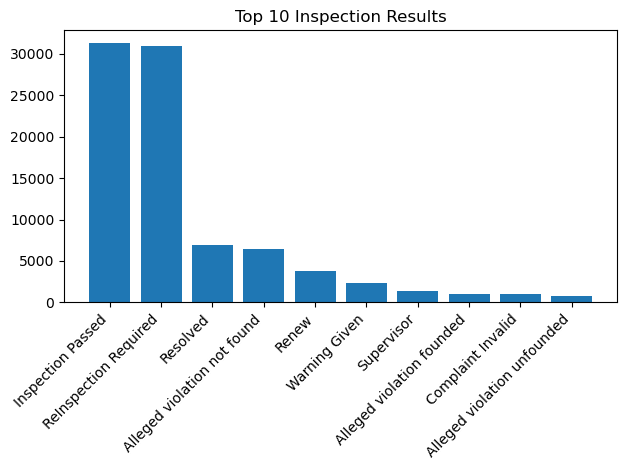

In [52]:
top_results = df_results.nlargest(10, 'Count')
plt.figure()
plt.bar(top_results['Result'], top_results['Count'])
plt.title('Top 10 Inspection Results')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

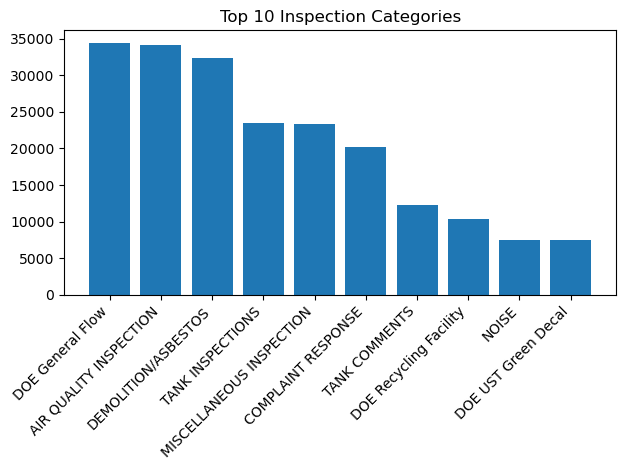

In [53]:
top_categories = df_categories.nlargest(10, 'Count')
plt.figure()
plt.bar(top_categories['Category'], top_categories['Count'])
plt.title('Top 10 Inspection Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

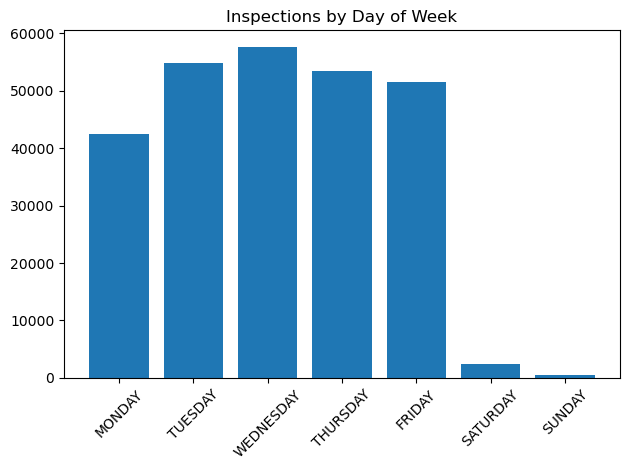

In [54]:
order = ['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY']
df_dow = df_dow.set_index('DOW').reindex(order).reset_index()
plt.figure()
plt.bar(df_dow['DOW'], df_dow['Count'])
plt.title('Inspections by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

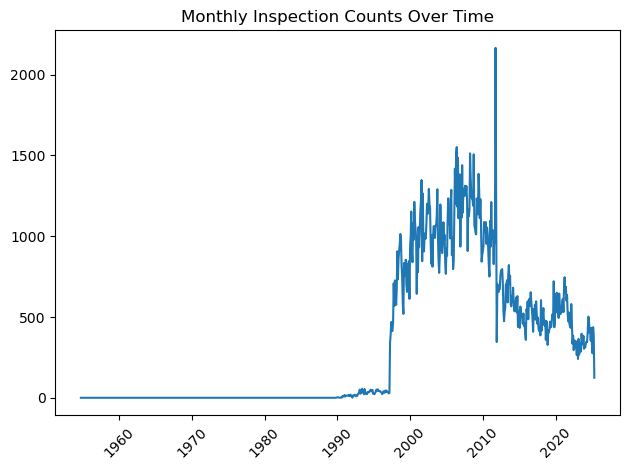

In [55]:
df_ym['YearMonth'] = pd.to_datetime(df_ym['YearMonth'], format='%Y-%m')
df_ym = df_ym.sort_values('YearMonth')
plt.figure()
plt.plot(df_ym['YearMonth'], df_ym['Count'])
plt.title('Monthly Inspection Counts Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

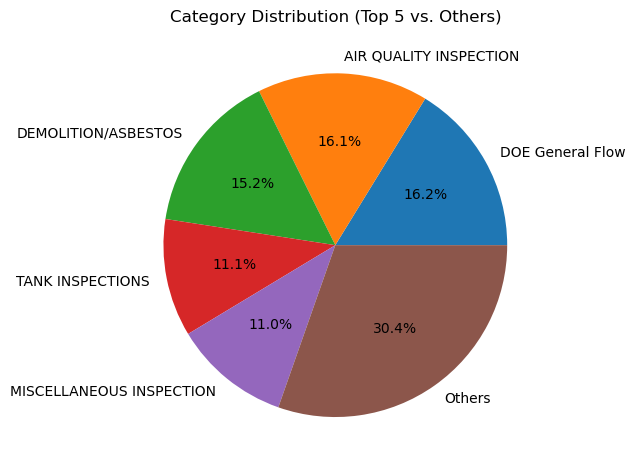

In [56]:
pie_top5 = top_categories.head(5).copy()
others = df_categories['Count'].sum() - pie_top5['Count'].sum()
pie_df = pd.concat([
    pie_top5,
    pd.DataFrame([{'Category':'Others','Count':others}])
], ignore_index=True)
plt.figure()
plt.pie(pie_df['Count'], labels=pie_df['Category'], autopct='%1.1f%%')
plt.title('Category Distribution (Top 5 vs. Others)')
plt.tight_layout()
plt.show()